# NLTK 1: Interactive exploration of corpora

Learning goals:

- How to install and import NLTK and its corpus data
- How to use NLTK to explore text corpora interactively
- Understand how useful raw text corpora can be
- Understand what we can understand about language by quantitative and distributional corpus linguistic applications
- Know how list comprehension helps to quickly do interactive exploration of corpora


## Installation and Setup

First, we need to install NLTK and download the book data.


In [1]:
!pip install nltk

In [2]:
import nltk

nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/siclemat/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | D

True

## Importing Modules

Before we start working with NLTK, let's understand how Python imports work.

### Statement: `import Module`

When you import a module, you need to use fully qualified dot notation to access its objects and functions:

```python
# Import module book from package nltk
import nltk.book

# Objects and functions from nltk.book can only
# be accessed with fully qualified dot notation.
print("Second token from text1:", nltk.book.text1[1])
# Second token from text1: Moby

# Objects and functions cannot be accessed directly:
print(text1[1])  # This will raise a NameError
# NameError: name 'text1' is not defined
```


### Statement: `from Module import *`

Alternatively, you can import all objects and functions from a module directly into your namespace:

```python
# Load module book from package nltk and
# import all its objects and functions into the current module
from nltk.book import *

# Objects and functions from nltk.book can be used without
# dotted notation: package.module.object
print("Second token of text1:", text1[1])

# The fully qualified dot notation does not work in this case
print("Second token of text1:", nltk.book.text1[1])  # This will raise a NameError
# NameError: name 'nltk' is not defined
```

**Note:** Using `from Module import *` is convenient for interactive exploration but should be used carefully in production code to avoid namespace conflicts.


## Loading the NLTK Interactive Demo

Note: This code is really meant for interactive exploration and prints out results more than returning values to compute with.


In [9]:
from nltk.book import *

texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Texts are sequences of tokens

We can use the indexing or slicing notation to access tokens in a text.


In [3]:
text1[0:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

Their type is `nltk.text.Text`, but their slices are simple lists of strings.


In [6]:
type(text1), type(text1[0]), type(text1[0:10])

(nltk.text.Text, str, list)

## Create concordances: KWIC (Keyword in Context)

Which text is "Moby Dick"? Which one is "Sense and Sensibility"?


In [8]:
text1.concordance("man", lines=10, width=68)
print()
text2.concordance("man", lines=10, width=68)

Displaying 10 of 527 matches:
as ) which is but an artificial man ." -- OPENING SENTENCE OF HOBBE
hat sort that was killed by any man , such is his fierceness and sw
 deepest reveries -- stand that man on his legs , set his feet a - 
he urbane activity with which a man receives money is really marvel
that on no account can a monied man enter heaven . Ah ! how cheerfu
uly , enough to drive a nervous man distracted . Yet was there a so
dle sojourning in the body of a man , travelled full forty feet , a
, bustles a little withered old man , who , for their money , dearl
 up with the half of any decent man ' s blanket . " I thought so . 
s much noise as the rest . This man interested me at once ; and sin

Displaying 10 of 121 matches:
ner of this estate was a single man , who lived to a very advanced 
on , a steady respectable young man , was amply provided for by the
was not an ill - disposed young man , unless to be rather cold hear
ist between the children of any man by different marria

In [ ]:
text1.concordance("woman", lines=10, width=68)
print()
text2.concordance("woman", lines=10, width=68)

## Word frequencies in a corpus

Which book talks more about "love" independent of its length? Let's compute relative frequencies...


In [13]:
text1.count("love") / len(text1)

9.201783612390202e-05

In [14]:
text2.count("love") / len(text2)

0.0005438774933604566

Ok, these numbers urgently need some formatting. Let's use format strings from Python


In [15]:
print(
    f"Text1: {text1.count('love')/len(text1):.4%}\nText2:"
    f" {text2.count('love')/len(text2):.4%}"
)

Text1: 0.0092%
Text2: 0.0544%


## Frequency distributions

Calculate the frequency of all different tokens (=Types) in a text.
Should follow the [Zipfian Law](https://en.wikipedia.org/wiki/Zipf%27s_law) for larger text corpora


In [16]:
fdist = FreqDist(text1)
vocabulary = sorted(fdist, key=fdist.get, reverse=True)
for w in vocabulary[:20]:
    print(w, "\t\t", fdist[w])

, 		 18713
the 		 13721
. 		 6862
of 		 6536
and 		 6024
a 		 4569
to 		 4542
; 		 4072
in 		 3916
that 		 2982
' 		 2684
- 		 2552
his 		 2459
it 		 2209
I 		 2124
s 		 1739
is 		 1695
he 		 1661
with 		 1659
was 		 1632


<h3>Printing a plot</h3>
Make sure that the plot object is rendered by Jupyter


In [17]:
! pip install matplotlib

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

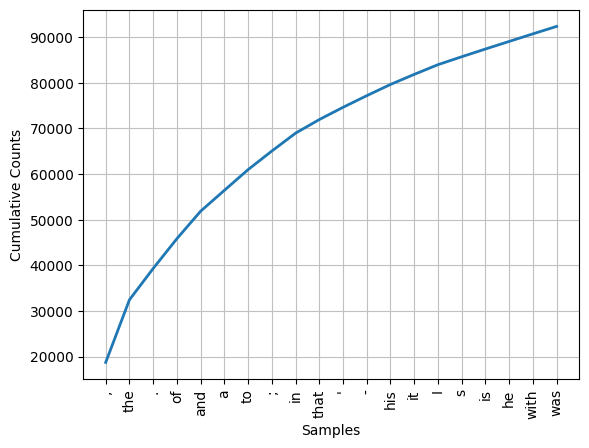

In [18]:
%matplotlib inline
fdist.plot(20,cumulative=True)

Let's create a log-log plot to see if Zipf's law holds.


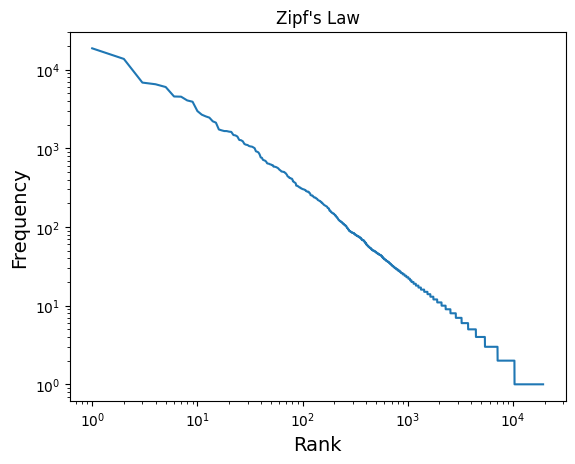

In [19]:
import matplotlib.pyplot as plt

# Get the frequencies of words in the vocabulary, which is already sorted by frequency
frequencies = [fdist[word] for word in vocabulary]
# Generate the ranks for the words
ranks = range(1, len(vocabulary) + 1)

# Create the log-log plot
plt.loglog(ranks, frequencies)
plt.xlabel("Rank", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Zipf's Law")
plt.show()

## Distributional Similarity

- "You shall know a word by the company it keeps!" (J. R. Firth, 1957)
- "words that occur in the same contexts tend to have similar meanings" (Pantel, 2005)

Which words do appear in similar contexts?

### How does it work technically?

- NLTK ranks similar words by the number of shared context pairs.
- For each target word, NLTK collects all `(left-word, right-word)` contexts in which
  it appears.
- It then computes, for every other word, how many of these context pairs it shares.
- The words are sorted in descending order of shared-context count.

Thus the similar() output is a frequency-based ranking: words at the top occur in the largest number of identical left–right contexts as the target word.

Again: Could you guess which text is "Moby Dick" and which one is "Sense and
Sensibility"?


In [22]:
text1.similar("woman")
print()
text2.similar("woman")

man king hand whale devil as bird mast job lord day serpent boat stone
ship harris captain mariner fellow hands

man way year moment word men letter friend person gentleman living
situation part lady wife child time thing little day


In [ ]:
text1.similar("love")
print()
text2.similar("love")

## Statistical collocations

Which word pairs occur more often than expected by chance?

-     **Expected frequency**: Assume each word occurs independently according to its unigram frequency. Drawing two words consecutively from an urn models the probability of a bigram occurring by chance.
-     **Empirical frequency**: Compute the actual bigram distribution observed in the corpus.
-     A word pair is a [**statistical collocation**] (https://en.wikipedia.org/wiki/Collocation) when its observed bigram frequency substantially exceeds the expected frequency, indicating a non-random association.


In [25]:
print(text1.collocation_list())
print()
print(text2.collocation_list())

[('Sperm', 'Whale'), ('Moby', 'Dick'), ('White', 'Whale'), ('old', 'man'), ('Captain', 'Ahab'), ('sperm', 'whale'), ('Right', 'Whale'), ('Captain', 'Peleg'), ('New', 'Bedford'), ('Cape', 'Horn'), ('cried', 'Ahab'), ('years', 'ago'), ('lower', 'jaw'), ('never', 'mind'), ('Father', 'Mapple'), ('cried', 'Stubb'), ('chief', 'mate'), ('white', 'whale'), ('ivory', 'leg'), ('one', 'hand')]

[('Colonel', 'Brandon'), ('Sir', 'John'), ('Lady', 'Middleton'), ('Miss', 'Dashwood'), ('every', 'thing'), ('thousand', 'pounds'), ('dare', 'say'), ('Miss', 'Steeles'), ('said', 'Elinor'), ('Miss', 'Steele'), ('every', 'body'), ('John', 'Dashwood'), ('great', 'deal'), ('Harley', 'Street'), ('Berkeley', 'Street'), ('Miss', 'Dashwoods'), ('young', 'man'), ('Combe', 'Magna'), ('every', 'day'), ('next', 'morning')]


## Dispersion plots

How are specific words distributed across a chronological sequence of texts?  
Example: _U.S. Inaugural Addresses_

- The timeline is represented implicitly by the **ordered sequence of speeches**.
- A dispersion plot marks each occurrence of a word along this sequence, showing **when** and **how frequently** it appears.


/Users/siclemat/lehre/hs25/pcl1/introduction-to-cl-uzh/venv/lib/python3.11/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


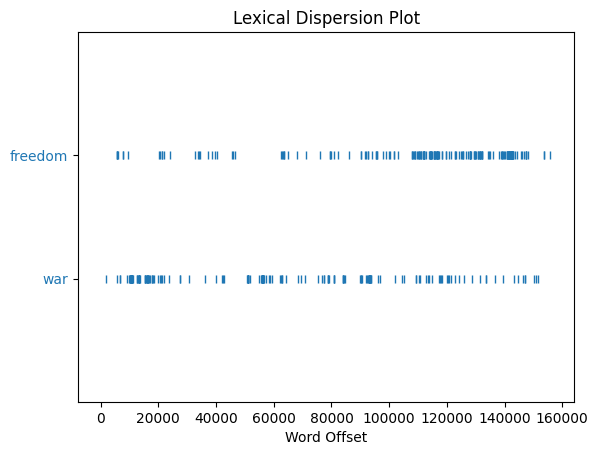

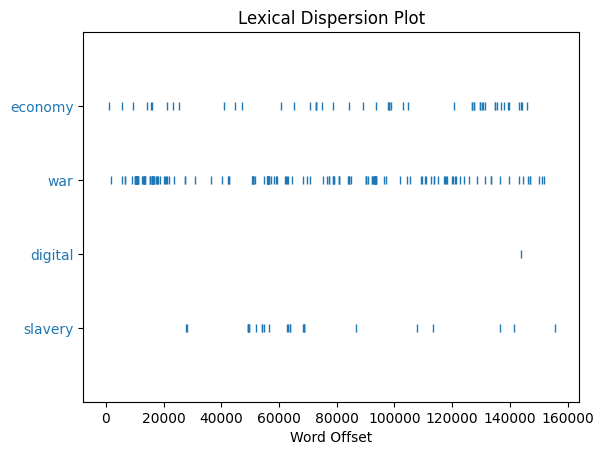

In [26]:
text4.dispersion_plot(["freedom", "war"])
text4.dispersion_plot(["economy", "war", "digital", "slavery"])

## Frequency-Based Text Generation

A simple n-gram language model predicts the next word from the **preceding n−1 words**.

- Build an **n-gram frequency table** from the corpus (e.g. trigrams).
- Convert counts into **conditional probabilities**:  
  P(next_word | w1, w2) = count(w1, w2, next_word) / count(w1, w2)
- Generate text by repeatedly **sampling the next word** from this conditional distribution.
- Resulting output reflects local phrase patterns learned from the presidential speeches.


In [28]:
t = text4.generate(text_seed="Freedom".split(), length=40)

Freedom is one of the people of this Government in a great internal revolution
, and our conscience compel us to teach with persuasion , to expect ,
and to reduce their number from a great measure driven from the lies


With 2025's generative AI language models, we know what is possible. But here are some
earlier approaches that represent important steps in the development of text generation
(and can be even more fun to play with):

Text generation using recursive neural networks from 2015, which can take a little more of the already expressed material into account when proposing the next word: https://cyborg.tenso.rs

- Recommended: Language model of (re-)tweets by/with Donald Trump (e.g. start with "America")
- Start with "I love" and select different training corpora (e.g. Linux:-)

Early GPT-2 transformer-based text generation:

- Write your next ACL paper with it: [This paper describes](https://transformer.huggingface.co/doc/arxiv-nlp/BcKBkznNiWnDfJdynrvMxQkF/edit)
